In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Wine dataset
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# Assign column names
wine.columns = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols',
                'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']

# Check the first few rows of the dataset
print(wine.head())

# Check summary statistics
print(wine.describe())

# Check for missing values
print(wine.isnull().sum())

# Check class distribution
print(wine['Class'].value_counts())


   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

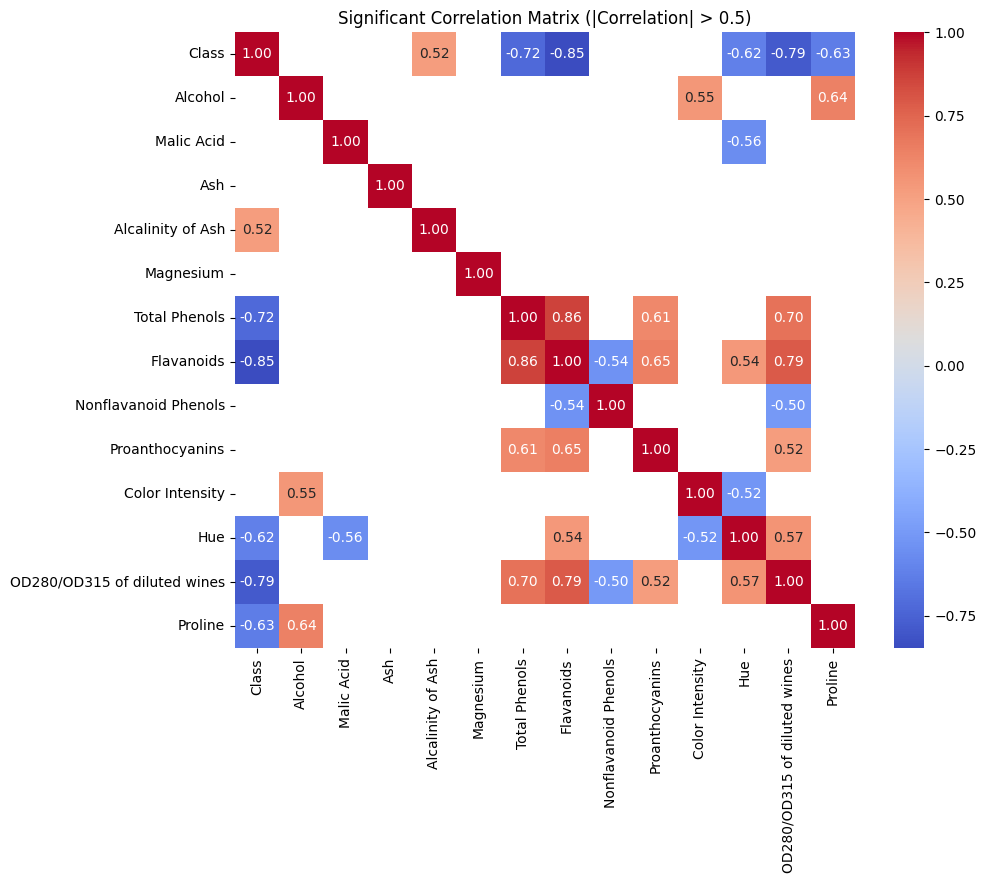

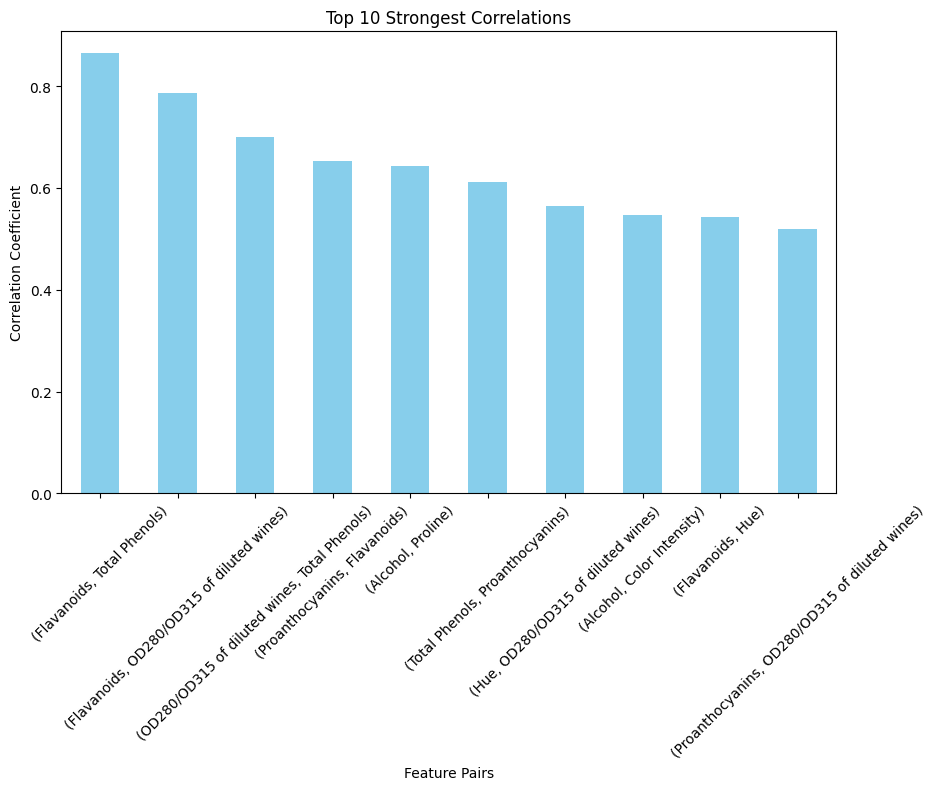

In [4]:
# Filter correlation matrix to include only correlations above 0.5
corr_matrix = wine.corr()
significant_corr = corr_matrix[abs(corr_matrix) > 0.5]
plt.figure(figsize=(10, 8))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Significant Correlation Matrix (|Correlation| > 0.5)')
plt.show()

# Bar chart of the strongest correlations
plt.figure(figsize=(10, 6))
strongest_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
strongest_corr = strongest_corr[strongest_corr != 1]  # Remove correlations with itself
strongest_corr = strongest_corr.head(10)  # Display top 10 correlations
strongest_corr.plot(kind='bar', color='skyblue')
plt.title('Top 10 Strongest Correlations')
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Split the dataset into features and target variable
X = wine.drop('Class', axis=1)
y = wine['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standard scaling and classifier
scaler = StandardScaler()
models = [LogisticRegression(), RandomForestClassifier(), SVC()]
best_model = None
best_score = 0

for model in models:
    pipeline = make_pipeline(scaler, model)
    cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    if cv_score > best_score:
        best_score = cv_score
        best_model = model

print("Best Model:", best_model)
print("Cross-validation Accuracy:", best_score)


Best Model: LogisticRegression()
Cross-validation Accuracy: 0.9790640394088671


In [6]:
# Train the best model
pipeline = make_pipeline(StandardScaler(), best_model)
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


      Actual Predicted
24   Class 1   Class 1
18   Class 1   Class 1
128  Class 2   Class 2
114  Class 2   Class 2
150  Class 3   Class 3
174  Class 3   Class 3
117  Class 2   Class 2
19   Class 1   Class 1
145  Class 3   Class 3
171  Class 3   Class 3

Prediction Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



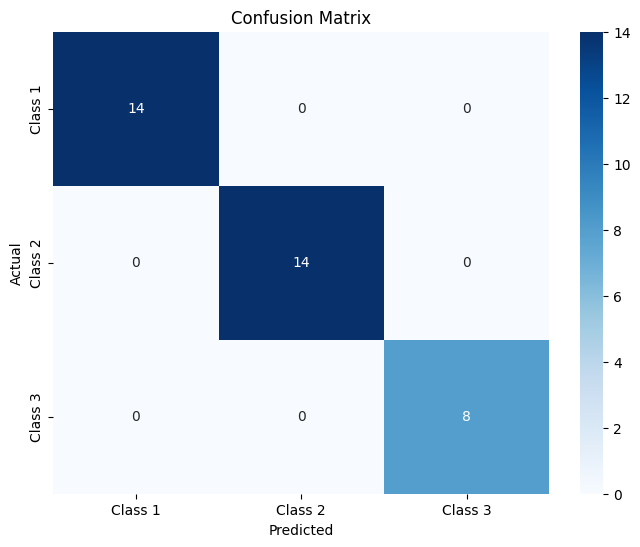

In [7]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Create a DataFrame to store actual and predicted values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add class labels for better interpretation
class_labels = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3'}
predictions_df['Actual'] = predictions_df['Actual'].map(class_labels)
predictions_df['Predicted'] = predictions_df['Predicted'].map(class_labels)

# Display a sample of the predictions
print(predictions_df.sample(10))

# Generate a detailed report on the predictions
print("\nPrediction Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
